# Homework 09: Spectral Clustering
## Batuhan Yalçın
### May 24, 2022

In [52]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.spatial as spa
from scipy.stats import multivariate_normal
from numpy.linalg import eig

## Step 1

## Importing Data

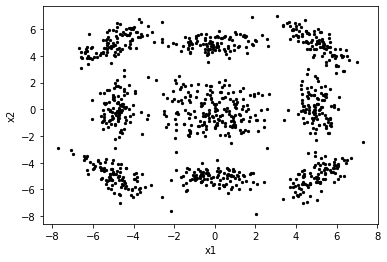

In [53]:
X = np.genfromtxt("hw09_data_set.csv", delimiter = ",")
# Initializations
initial_means = np.array([[+5.0, +5.0],
                          [-5.0, +5.0],
                          [-5.0, -5.0],
                          [+5.0, -5.0],
                          [+5.0, +0.0],
                          [+0.0, +5.0],
                          [-5.0, +0.0],
                          [+0.0, -5.0],
                          [+0.0, +0.0]])

initial_covariances = np.array([[[+0.8, -0.6], [-0.6, +0.8]],
                                [[+0.8, +0.6], [+0.6, +0.8]],
                                [[+0.8, -0.6], [-0.6, +0.8]],
                                [[+0.8, +0.6], [+0.6, +0.8]],
                                [[+0.2, +0.0], [+0.0, +1.2]],
                                [[+1.2, +0.0], [+0.0, +0.2]],
                                [[+0.2, +0.0], [+0.0, +1.2]],
                                [[+1.2, +0.0], [+0.0, +0.2]],
                                [[+1.6, +0.0], [+0.0, +1.6]]])
N = np.shape(X)[0] 
K = np.shape(initial_means)[0] 
Dimension = np.shape(X)[1]

plt.figure()
plt.figsize=(8, 8)
plt.scatter(X[:, 0], X[:, 1], s=5, color="k")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

## Step 2

## Algorithm Steps

In [54]:
  def Euclidian(x1, x2):   
    distance = np.sqrt( pow((x1[0] -x2[0]),2) + pow((x1[1] -x2[1]),2))
    return distance



# threshold.                       
S = 2

## Calculating Matrix B

In [55]:
B = np.zeros((N,N))
for i in range(N):
    for j in range(i+1,N):
        
        if Euclidian(X[i], X[j]) < S:
            B[i][j] = 1
            B[j][i] = 1## Algorithm Steps

## visualization of connectivity matrix

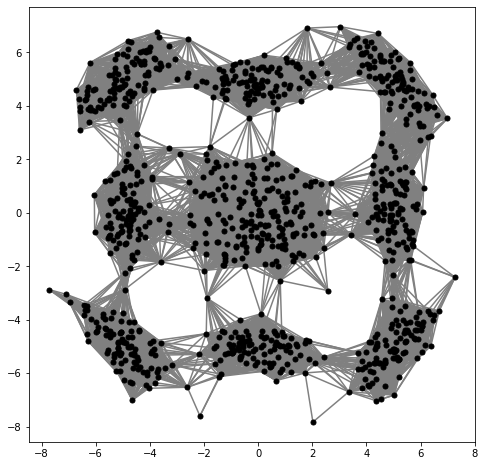

In [56]:
plt.figure(figsize=(8, 8))

for i in range(N):
    for j in range(i+1,N):
        if B[i][j] == 1:
            x_values = [X[i,0], X[j,0]]
            y_values = [X[i,1], X[j,1] ]
            plt.plot(x_values,y_values, color ="gray")
            
plt.plot(X[:, 0], X[:, 1], ".", markersize = 10, color ='black')   
plt.show()

## Step 3

## Calculating D and L matrices

In [57]:
D = np.zeros((N,N))
D_sqrt = np.zeros((N,N))
L = np.zeros((N,N))
I = np.identity(N)
for i in range(N):
    D[i,i] = sum(B[i,:])
    if (D[i,i]==0):
        print("Error not invertible")
        break

np.fill_diagonal(D_sqrt,[np.sqrt(1/D[i,i]) for i in range(N)])
L_symmetric=I-np.matmul(D_sqrt, np.matmul(B,D_sqrt))
print("print(L_symmetric[0:5, 0:5])")
print(L_symmetric[0:5, 0:5])

print(L_symmetric[0:5, 0:5])
[[ 1.          0.         -0.01277024 -0.01689343 -0.01277024]
 [ 0.          1.         -0.01683588  0.          0.        ]
 [-0.01277024 -0.01683588  1.          0.         -0.01190476]
 [-0.01689343  0.          0.          1.          0.        ]
 [-0.01277024  0.         -0.01190476  0.          1.        ]]


## Step 4

## Calculating  matrix Z

In [59]:
#Constants
R = 5
Z = np.zeros((N,R))

values, vector = eig(L_symmetric)

#first smallest deleted
index = np.argsort(values)[:R+1] 

for i in range(R):
    Z[:,i] =  vector[:,index[i+1] ]
    
print("print(Z[0:5, 0:5]))")
print(Z[0:5, 0:5])

print(Z[0:5, 0:5]))
[[ 0.02492986 -0.03008423 -0.00946604  0.05116243  0.0229564 ]
 [ 0.01590745 -0.02367529 -0.00235798  0.037579    0.0141235 ]
 [ 0.02601003 -0.03273215 -0.00886993  0.05526008  0.02411414]
 [ 0.02147879 -0.02190107 -0.01054254  0.03633024  0.0175098 ]
 [ 0.02624211 -0.03262591 -0.00925994  0.05524827  0.02432336]]


## Step 5

## k-means clustering algorithm

In [63]:
centroids = None
memberships = None


def update_centroids(memberships, X):
    if memberships is None:
        centroids =np.array([Z[242,:],Z[528,:],Z[570,:],Z[590,:],Z[648,:],Z[667,:],Z[774,:],Z[891,:],Z[955,:]]) # Initialize the centroids as it is asked in PDF.
    else:
        centroids = np.vstack([np.mean(X[memberships == k,:], axis = 0) for k in range(K)])
    return(centroids)

def update_memberships(centroids, X):
    # calculate distances between centroids and data points
    D = spa.distance_matrix(centroids, X)
    # find the nearest centroid for each data point
    memberships = np.argmin(D, axis = 0)
    return(memberships)
    
iteration = 1
while True:

    old_centroids = centroids
    centroids = update_centroids(memberships, Z)
    if np.alltrue(centroids == old_centroids):
        break
    old_memberships = memberships
    memberships = update_memberships(centroids, Z)
    if np.alltrue(memberships == old_memberships):
        break    
    iteration = iteration + 1

centroids = update_centroids(memberships, X) 

## Visualization

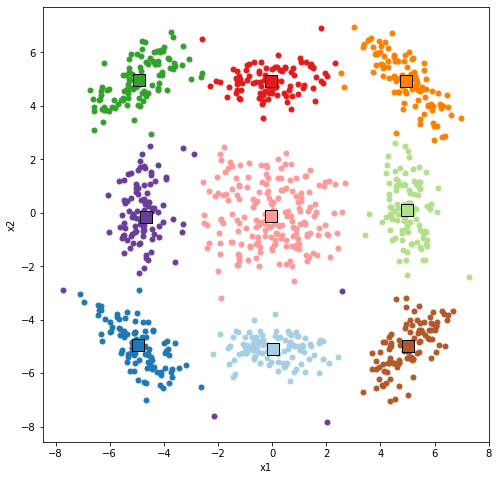

In [65]:
def plot_current_state(centroids, memberships, X):
    cluster_colors = np.array(["#1f78b4", "#33a02c", "#e31a1c", "#ff7f00", "#6a3d9a", "#b15928",
                               "#a6cee3", "#b2df8a", "#fb9a99", "#fdbf6f", "#cab2d6", "#ffff99"])
    if memberships is None:
        plt.plot(X[:,0], X[:,1], ".", markersize = 10, color = "black")
    else:
        for c in range(K):
            plt.plot(X[memberships == c, 0], X[memberships == c, 1], ".", markersize = 10,
                     color = cluster_colors[c])
    for c in range(K):
        plt.plot(centroids[c, 0], centroids[c, 1], "s", markersize = 12, 
                 markerfacecolor = cluster_colors[c], markeredgecolor = "black")
    plt.xlabel("x1")
    plt.ylabel("x2")
    
plt.figure(figsize=(8, 8))  
plot_current_state(centroids, memberships, X)